# Explore overffiting and underfitting

[source site](https://www.tensorflow.org/beta/tutorials/keras/overfit_and_underfit)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 8s 0us/step


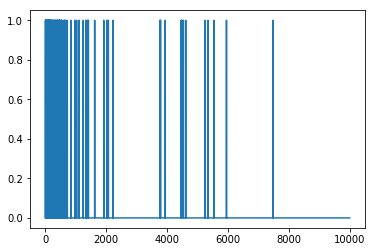

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2) # note that train accuracy and validation accuracy to check overfitted model.

W0626 15:26:53.774872 139634645825344 deprecation.py:323] From /home/hyunsu/anaconda3/envs/tf20_py36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.4903 - accuracy: 0.8009 - binary_crossentropy: 0.4903 - val_loss: 0.3453 - val_accuracy: 0.8729 - val_binary_crossentropy: 0.3453
Epoch 2/20
25000/25000 - 2s - loss: 0.2564 - accuracy: 0.9096 - binary_crossentropy: 0.2564 - val_loss: 0.2855 - val_accuracy: 0.8879 - val_binary_crossentropy: 0.2855
Epoch 3/20
25000/25000 - 2s - loss: 0.1860 - accuracy: 0.9339 - binary_crossentropy: 0.1860 - val_loss: 0.2892 - val_accuracy: 0.8839 - val_binary_crossentropy: 0.2892
Epoch 4/20
25000/25000 - 2s - loss: 0.1506 - accuracy: 0.9479 - binary_crossentropy: 0.1506 - val_loss: 0.3178 - val_accuracy: 0.8757 - val_binary_crossentropy: 0.3178
Epoch 5/20
25000/25000 - 2s - loss: 0.1242 - accuracy: 0.9580 - binary_crossentropy: 0.1242 - val_loss: 0.3331 - val_accuracy: 0.8753 - val_binary_crossentropy: 0.3331
Epoch 6/20
25000/25000 - 2s - loss: 0.1036 - accuracy: 0.9676 - binary_crossentropy: 0.1036 - val_loss: 0.3625

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6621 - accuracy: 0.5814 - binary_crossentropy: 0.6621 - val_loss: 0.6259 - val_accuracy: 0.7045 - val_binary_crossentropy: 0.6259
Epoch 2/20
25000/25000 - 2s - loss: 0.5769 - accuracy: 0.7525 - binary_crossentropy: 0.5769 - val_loss: 0.5517 - val_accuracy: 0.7833 - val_binary_crossentropy: 0.5517
Epoch 3/20
25000/25000 - 2s - loss: 0.5046 - accuracy: 0.8316 - binary_crossentropy: 0.5046 - val_loss: 0.5016 - val_accuracy: 0.8394 - val_binary_crossentropy: 0.5016
Epoch 4/20
25000/25000 - 2s - loss: 0.4551 - accuracy: 0.8769 - binary_crossentropy: 0.4551 - val_loss: 0.4703 - val_accuracy: 0.8572 - val_binary_crossentropy: 0.4703
Epoch 5/20
25000/25000 - 2s - loss: 0.4190 - accuracy: 0.9003 - binary_crossentropy: 0.4190 - val_loss: 0.4493 - val_accuracy: 0.8715 - val_binary_crossentropy: 0.4493
Epoch 6/20
25000/25000 - 1s - loss: 0.3904 - accuracy: 0.9166 - binary_crossentropy: 0.3904 - val_loss: 0.4372

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.3407 - accuracy: 0.8527 - binary_crossentropy: 0.3407 - val_loss: 0.2987 - val_accuracy: 0.8771 - val_binary_crossentropy: 0.2987
Epoch 2/20
25000/25000 - 2s - loss: 0.1422 - accuracy: 0.9483 - binary_crossentropy: 0.1422 - val_loss: 0.3361 - val_accuracy: 0.8724 - val_binary_crossentropy: 0.3361
Epoch 3/20
25000/25000 - 2s - loss: 0.0457 - accuracy: 0.9872 - binary_crossentropy: 0.0457 - val_loss: 0.4542 - val_accuracy: 0.8680 - val_binary_crossentropy: 0.4542
Epoch 4/20
25000/25000 - 2s - loss: 0.0066 - accuracy: 0.9991 - binary_crossentropy: 0.0066 - val_loss: 0.6021 - val_accuracy: 0.8668 - val_binary_crossentropy: 0.6021
Epoch 5/20
25000/25000 - 2s - loss: 0.0015 - accuracy: 0.9999 - binary_crossentropy: 0.0015 - val_loss: 0.6839 - val_accuracy: 0.8680 - val_binary_crossentropy: 0.6839
Epoch 6/20
25000/25000 - 2s - loss: 4.1805e-04 - accuracy: 1.0000 - binary_crossentropy: 4.1805e-04 - val_loss

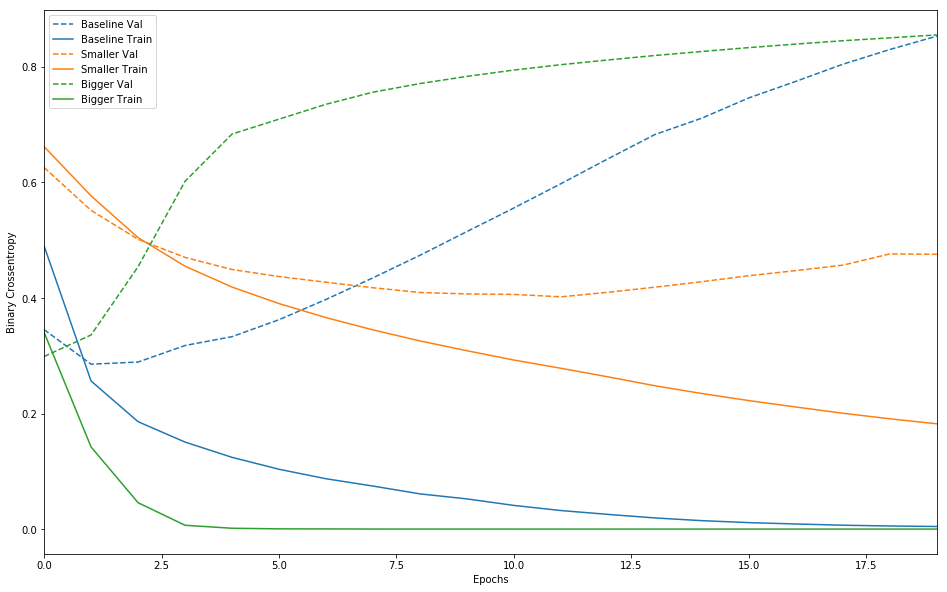

In [10]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## how to prevent overffit.
* there're several regularization, including L1, L2 norm. Here, we gonna use L2 regularization

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.5587 - accuracy: 0.7681 - binary_crossentropy: 0.5199 - val_loss: 0.4100 - val_accuracy: 0.8694 - val_binary_crossentropy: 0.3694
Epoch 2/20
25000/25000 - 2s - loss: 0.3251 - accuracy: 0.9040 - binary_crossentropy: 0.2784 - val_loss: 0.3411 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2899
Epoch 3/20
25000/25000 - 2s - loss: 0.2634 - accuracy: 0.9260 - binary_crossentropy: 0.2091 - val_loss: 0.3407 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2844
Epoch 4/20
25000/25000 - 2s - loss: 0.2383 - accuracy: 0.9382 - binary_crossentropy: 0.1802 - val_loss: 0.3574 - val_accuracy: 0.8806 - val_binary_crossentropy: 0.2980
Epoch 5/20
25000/25000 - 2s - loss: 0.2216 - accuracy: 0.9456 - binary_crossentropy: 0.1610 - val_loss: 0.3683 - val_accuracy: 0.8783 - val_binary_crossentropy: 0.3069
Epoch 6/20
25000/25000 - 2s - loss: 0.2086 - accuracy: 0.9514 - binary_crossentropy: 0.1462 - val_loss: 0.3795

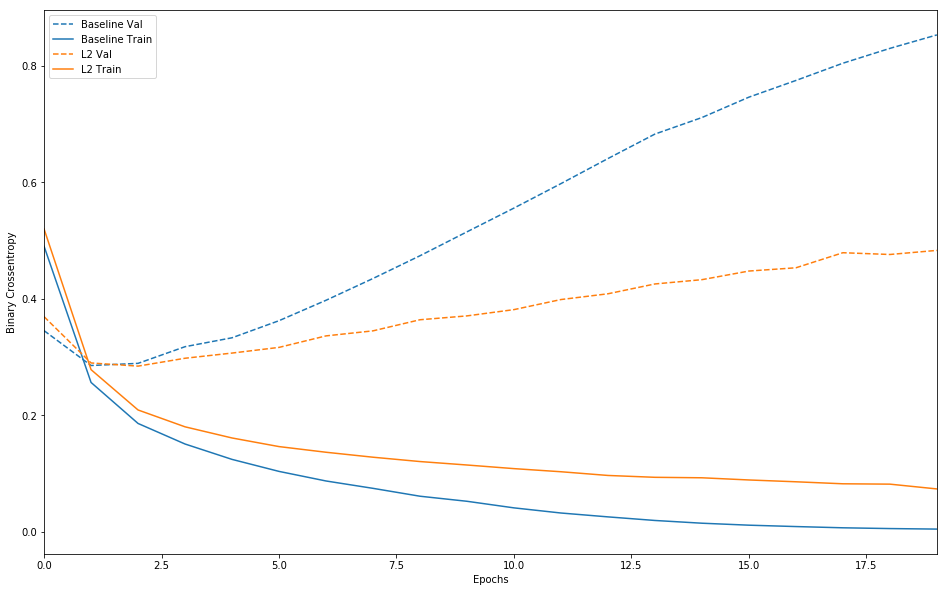

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)]) # note that L2 regularization make network to resist from overfitting.

* another method is the famous Dropout.

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6016 - accuracy: 0.6704 - binary_crossentropy: 0.6016 - val_loss: 0.4302 - val_accuracy: 0.8626 - val_binary_crossentropy: 0.4302
Epoch 2/20
25000/25000 - 2s - loss: 0.4155 - accuracy: 0.8295 - binary_crossentropy: 0.4155 - val_loss: 0.3144 - val_accuracy: 0.8835 - val_binary_crossentropy: 0.3144
Epoch 3/20
25000/25000 - 2s - loss: 0.3209 - accuracy: 0.8808 - binary_crossentropy: 0.3209 - val_loss: 0.2820 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2820
Epoch 4/20
25000/25000 - 2s - loss: 0.2666 - accuracy: 0.9062 - binary_crossentropy: 0.2666 - val_loss: 0.2733 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2733
Epoch 5/20
25000/25000 - 2s - loss: 0.2221 - accuracy: 0.9242 - binary_crossentropy: 0.2221 - val_loss: 0.2821 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2821
Epoch 6/20
25000/25000 - 2s - loss: 0.1914 - accuracy: 0.9380 - binary_crossentropy: 0.1914 - val_loss: 0.3001

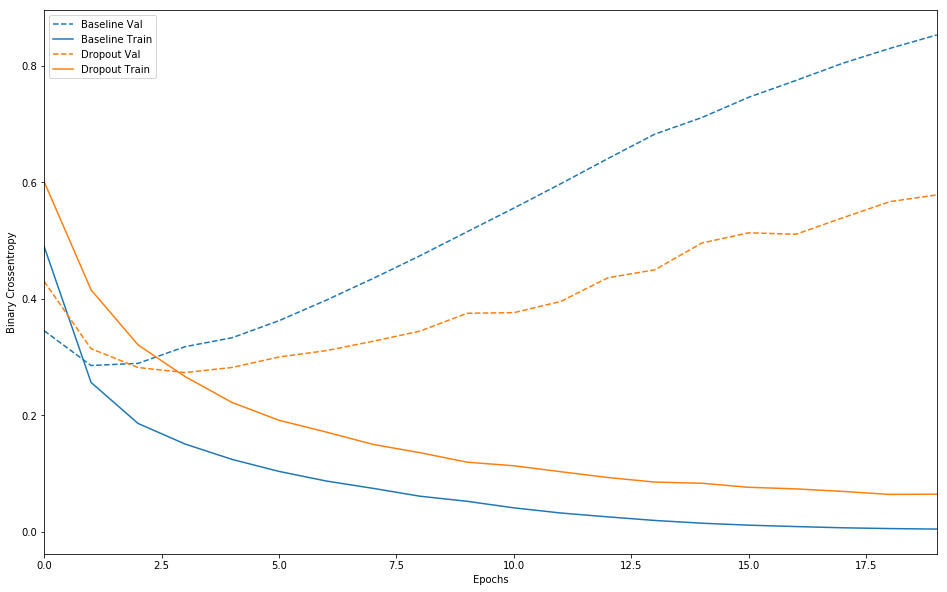

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])